# Manual, bottom-up creation of a polyphenylene-sulfone middle repeat unit fragment from MuPT core components

In [1]:
import logging
logging.basicConfig(level=logging.INFO, force=True)
logging.getLogger('matplotlib.font_manager').setLevel(logging.WARNING)

## Define unique types of bond (by end atom types)

In [2]:
from rdkit.Chem import BondType
from mupt.mupr.connection import Connector


arene_H_bond = Connector('H', linkables={'c'}, bondtype=BondType.SINGLE, label='arene_c-H')
arene_c_bond = Connector('c', linkables={'c'}, bondtype=BondType.AROMATIC, label='arene_c:c')
arene_substituent_bond = Connector('c', linkables={'H', 'S', '*'}, bondtype=BondType.SINGLE, label='arene_wild')

sulfonyl_c_bond = Connector('S', linkables={'c'}, bondtype=BondType.SINGLE, label='sulfonyl_c-S')
sulfonyl_S_bond = Connector('S', linkables={'O'}, bondtype=BondType.DOUBLE, label='sulfonyl_S=O')
sulfonyl_O_bond = Connector('O', linkables={'S'}, bondtype=BondType.DOUBLE, label='sulfonyl_O=S')

INFO:rdkit:Enabling RDKit 2025.03.4 jupyter extensions


## Define atomic Primitives, loosely representing unique chemical environments for atoms

In [3]:
from periodictable import elements
from mupt.mupr.primitives import Primitive


arene_carbon = Primitive(
    element=elements[6],
    connectors=[
        arene_substituent_bond.copy(),
        arene_c_bond.copy(),
        arene_c_bond.copy(),
    ],
    label='c',
)
arene_hydrogen = Primitive(
    element=elements[1],
    connectors=[
        arene_H_bond.copy(),
    ],
    label='H',
)
sulfur = Primitive(
    element=elements[16],
    connectors=[
        sulfonyl_c_bond.copy(),
        sulfonyl_c_bond.copy(),
        sulfonyl_S_bond.copy(),
        sulfonyl_S_bond.copy(),
    ],
    label='S',
)
terminal_oxygen = Primitive(
    element=elements[8],
    connectors=[
        sulfonyl_O_bond.copy(),
    ],
    label='O',
)
unique_prims : list[Primitive] = [arene_carbon, arene_hydrogen, sulfur, terminal_oxygen]
prim_map : dict[str, Primitive] = {prim.label: prim for prim in unique_prims}

## Manually build up chemical graph

/home/timber/miniconda3/envs/mupt-dev/lib/python3.13/site-packages/networkx/algorithms/graph_hashing.py:211: UserWarning: The hashes produced for graphs without node or edge attributeschanged in v3.5 due to a bugfix (see documentation).
  node_labels = _init_node_labels(G, edge_attr, node_attr)


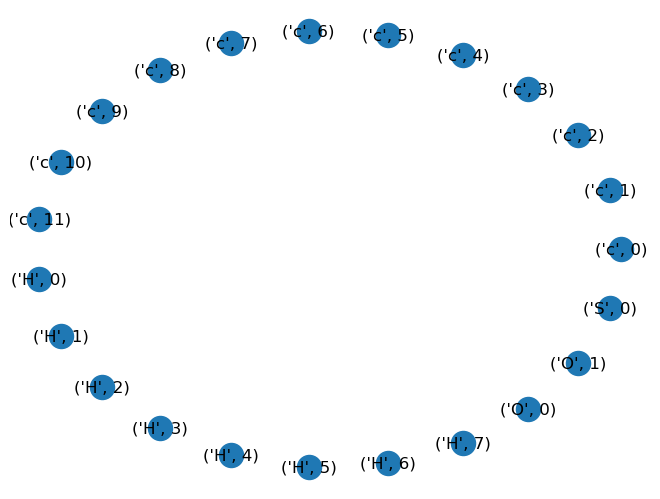

In [4]:
# insert atoms
molprim = Primitive(label='phenylene sulfone middle monomer')
elem_counts : dict[str, int] = { # analogous to a Hill formula
    'c' : 12,
    'H' : 8,
    'O' : 2,
    'S' : 1,
}
for label, num_elem in elem_counts.items():
    for _ in range(num_elem):
        molprim.attach_child(prim_map[label].copy())
molprim.topology.visualize()

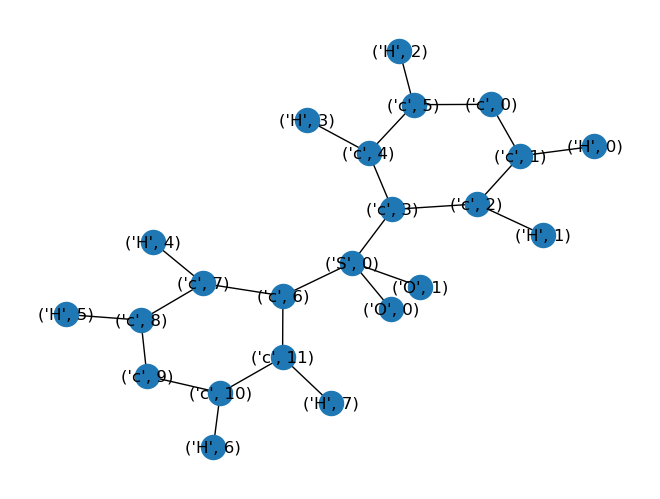

In [5]:
# pair up atoms
arene_1_bonds = [
    (('c', 0), ('arene_c:c', 1) , ('c', 1), ('arene_c:c', 0)),
    (('c', 1), ('arene_wild', 0), ('H', 0), ('arene_c-H', 0)),
    (('c', 1), ('arene_c:c', 1) , ('c', 2), ('arene_c:c', 0)),
    (('c', 2), ('arene_wild', 0), ('H', 1), ('arene_c-H', 0)),
    (('c', 2), ('arene_c:c', 1) , ('c', 3), ('arene_c:c', 0)),
    (('c', 3), ('arene_c:c', 1) , ('c', 4), ('arene_c:c', 0)),
    (('c', 4), ('arene_c:c', 1) , ('c', 5), ('arene_c:c', 0)),
    (('c', 4), ('arene_wild', 0), ('H', 3), ('arene_c-H', 0)),
    (('c', 5), ('arene_c:c', 1) , ('c', 0), ('arene_c:c', 0)),
    (('c', 5), ('arene_wild', 0), ('H', 2), ('arene_c-H', 0)),
]
sulfonyl_bonds = [
    (('S', 0), ('sulfonyl_c-S', 0), ('c', 3), ('arene_wild', 0)),
    (('S', 0), ('sulfonyl_S=O', 0), ('O', 0), ('sulfonyl_O=S', 0)),
    (('S', 0), ('sulfonyl_c-S', 1), ('c', 6), ('arene_wild', 0)),
    (('S', 0), ('sulfonyl_S=O', 1), ('O', 1), ('sulfonyl_O=S', 0)),
]

arene_2_bonds = [
    (('c',  6), ('arene_c:c', 1) , ('c', 7) , ('arene_c:c', 0)),
    (('c',  7), ('arene_wild', 0), ('H', 4) , ('arene_c-H', 0)),
    (('c',  7), ('arene_c:c', 1) , ('c', 8) , ('arene_c:c', 0)),
    (('c',  8), ('arene_wild', 0), ('H', 5) , ('arene_c-H', 0)),
    (('c',  8), ('arene_c:c', 1) , ('c', 9) , ('arene_c:c', 0)),
    (('c',  9), ('arene_c:c', 1) , ('c', 10), ('arene_c:c', 0)),
    (('c', 10), ('arene_c:c', 1) , ('c', 11), ('arene_c:c', 0)),
    (('c', 10), ('arene_wild', 0), ('H', 6) , ('arene_c-H', 0)),
    (('c', 11), ('arene_c:c', 1) , ('c', 6) , ('arene_c:c', 0)),
    (('c', 11), ('arene_wild', 0), ('H', 7) , ('arene_c-H', 0)),
]
all_bonds = [*arene_1_bonds, *sulfonyl_bonds, *arene_2_bonds]
for bonded_pair in all_bonds:
    molprim.connect_children(*bonded_pair)

molprim.topology.visualize()

In [6]:
# TODO: include demo of connection inference from toplevel topology assignment
display(molprim.external_connectors)
for conn_id in molprim.connectors.keys():
    display(molprim.connector_trace(conn_id))

{('arene_wild',
  0): ConnectorReference(primitive_handle=('c', 0), connector_handle=('arene_wild', 0)),
 ('arene_wild',
  9): ConnectorReference(primitive_handle=('c', 9), connector_handle=('arene_wild', 0))}

[Connector(anchor='c', linkables={'H', '*', 'S'}, bondtype=rdkit.Chem.rdchem.BondType.SINGLE, label='arene_wild', anchor_position=None, linker_position=None, bond_length=None, dihedral_plane_set=False),
 Connector(anchor='c', linkables={'H', '*', 'S'}, bondtype=rdkit.Chem.rdchem.BondType.SINGLE, label='arene_wild', anchor_position=None, linker_position=None, bond_length=None, dihedral_plane_set=False)]

[Connector(anchor='c', linkables={'H', '*', 'S'}, bondtype=rdkit.Chem.rdchem.BondType.SINGLE, label='arene_wild', anchor_position=None, linker_position=None, bond_length=None, dihedral_plane_set=False),
 Connector(anchor='c', linkables={'H', '*', 'S'}, bondtype=rdkit.Chem.rdchem.BondType.SINGLE, label='arene_wild', anchor_position=None, linker_position=None, bond_length=None, dihedral_plane_set=False)]

## Make a copy of the molecule-level primitive and translate it uniformly
Note: what is currently drawn is not the coordinates of the molecule, but just a visually easy-to-parse embedding of its topology graph

/home/timber/miniconda3/envs/mupt-dev/lib/python3.13/site-packages/networkx/algorithms/graph_hashing.py:211: UserWarning: The hashes produced for graphs without node or edge attributeschanged in v3.5 due to a bugfix (see documentation).
  node_labels = _init_node_labels(G, edge_attr, node_attr)


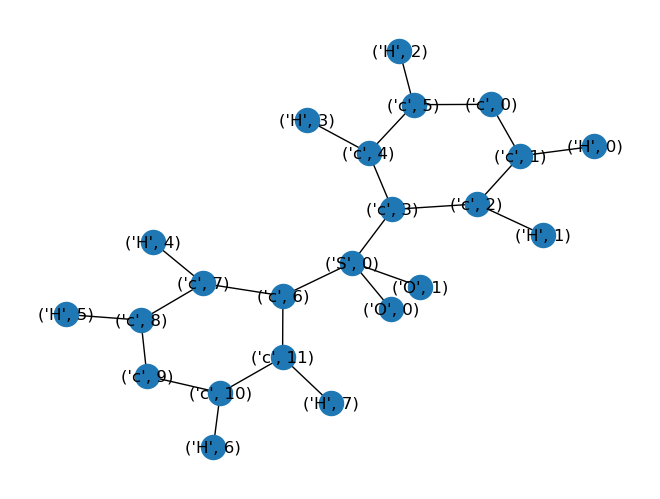

In [7]:
import numpy as np
from scipy.spatial.transform import RigidTransform


transform = RigidTransform.from_translation(np.array([5.0, 0.0, 0.0]))
molprim_copy = molprim.rigidly_transformed(transform)
molprim_copy.topology.visualize()

## Contracting sub-nodes into single "clustered" node

In [8]:
subs = {('S', 0), ('O', 0), ('O', 1)}
# molprim.contract(
#     subs,
#     master_label='sulfonyl group',
#     new_shape=None,
# )

In [9]:
subs = {'c3', 'c4', 'H3', 'c5', 'H2', 'c0', 'c1', 'H0', 'c2', 'H1'}
# molprim.contract(
#     subs,
#     master_label='phenyl group',
#     new_shape=None,
# )
# display(molprim.children_by_label['sulfonyl group'].topology)

## Testing non-example of unregisterable connections

In [10]:
# NBVAL_RAISES_EXCEPTION
c1 = Connector('a', linkables={'z'}, bondtype=BondType.DOUBLE)
c2 = Connector('b', linkables={'a'}, bondtype=BondType.SINGLE) # should fail, anchor of p1 not in linkables
# c2 = Connector('z', linkables={'a'}, bondtype=BondType.SINGLE) # should fail, bond types differ
# c2 = Connector('z', linkables={'a'}, bondtype=BondType.DOUBLE) # should not fail, since Connector pair is compatible

pairprim = Primitive()
p1 = Primitive(
    element=elements[7],
    label='N',
)
c1_handle = p1.register_connector(c1)
p1_handle = pairprim.attach_child(p1)

p2 = Primitive(
    element=elements[8],
    label='O',
)
c2_handle = p2.register_connector(c2)
p2_handle = pairprim.attach_child(
    p2,
    neighbor_connections={
        c2_handle : (p1_handle, c1_handle)
    }
)

# define topology
# pairprim.topology = TopologicalStructure([('N', 'O')])
pairprim.topology.visualize()

IncompatibleConnectorError: Connector ('Conn', 0) on Primitive ('O', 0) is not bondable with Connector ('Conn', 0) on Primitive ('N', 0)